# Logistic Map

Daniel Koehn

Schwentinental, 25th of December 2020

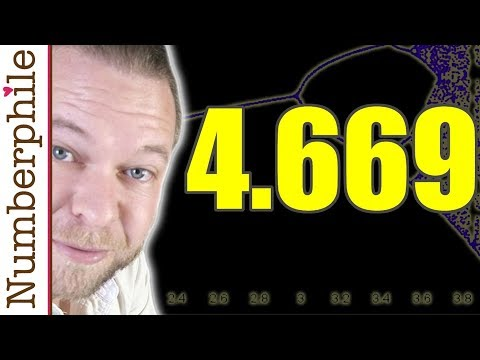

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ETrYE4MdoLQ')

In [2]:
# Import libraries
import numpy
from matplotlib import pyplot

# import JIT from Numba
from numba import jit

In [3]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

## Compute Population evolution using the Logisitic Map

$x_{n+1} = \alpha x_{n} (1 - x_{n})$

In [4]:
def logistic_map(alpha, itermax, x0):
    
    x = numpy.zeros(itermax+1)
    
    x[0] = x0
    for i in range(1, itermax+1):
        
        x[i] = alpha * x[i-1] * (1. - x[i-1]) 
    
    return x

Population evolution for $\alpha = 2.3$

In [5]:
x0 = 0.5      # initial population
alpha = 2.3   # fertility
itermax = 100 # maxium iteration

x2p3 = logistic_map(alpha,itermax,x0)

Population evolution for $\alpha = .65$

In [6]:
x0 = 0.5      # initial population
alpha = .65   # fertility
itermax = 100 # maxium iteration

x0p65 = logistic_map(alpha,itermax,x0)

Population evolution for $\alpha = 3.2$

In [7]:
x0 = 0.5      # initial population
alpha = 3.2   # fertility
itermax = 100 # maxium iteration

x3p2 = logistic_map(alpha,itermax,x0)

Population evolution for $\alpha = 3.5$

In [8]:
x0 = 0.5      # initial population
alpha = 3.5   # fertility
itermax = 100 # maxium iteration

x3p5 = logistic_map(alpha,itermax,x0)

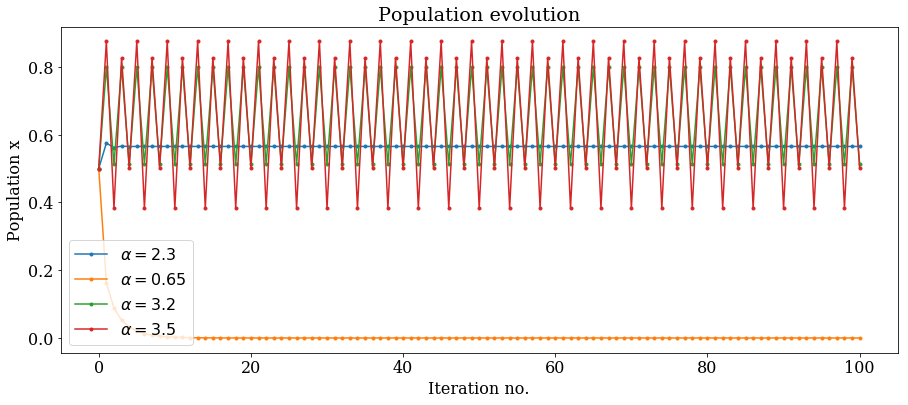

In [9]:
# Plot population evolution
fig = pyplot.figure(figsize=(15., 6.))
pyplot.tight_layout()
pyplot.plot(x2p3,'.-',label=r'$\alpha = 2.3$')
pyplot.plot(x0p65,'.-',label=r'$\alpha = 0.65$')
pyplot.plot(x3p2,'.-',label=r'$\alpha = 3.2$')
pyplot.plot(x3p5,'.-',label=r'$\alpha = 3.5$')
pyplot.xlabel('Iteration no.')
pyplot.ylabel('Population x')
pyplot.title('Population evolution')
pyplot.legend()

# save population evolution as pdf 
pyplot.savefig('logistic_map_evolution.jpeg', bbox_inches='tight', dpi=150)
pyplot.show()

#### Bifurcation diagram

In [10]:
def bifurcation(nalpha, storemax, itermax, x0, alpha1, store_x, store_alpha):
    
    # compute and plot fixpoints
    fig = pyplot.figure(figsize=(15., 6.))
    pyplot.tight_layout()    
    
    for n in range(nalpha):
    
        x = logistic_map(alpha1[n],itermax,x0)
    
        count = 0
        for i in range(itermax-storemax, itermax):            
            store_x[count,n] = x[i]
            store_alpha[count,n] = alpha1[n]
            count +=1
            
    pyplot.plot(store_alpha,store_x,'k,')
    pyplot.xlabel(r'$\alpha$')
    pyplot.ylabel(r'Population $x_{fix}$')
    pyplot.title('Bifurcation diagram')

    # save bifurcation diagram as pdf 
    pyplot.savefig('logistic_map_bifurcation.jpeg', bbox_inches='tight', dpi=150)
    pyplot.show()

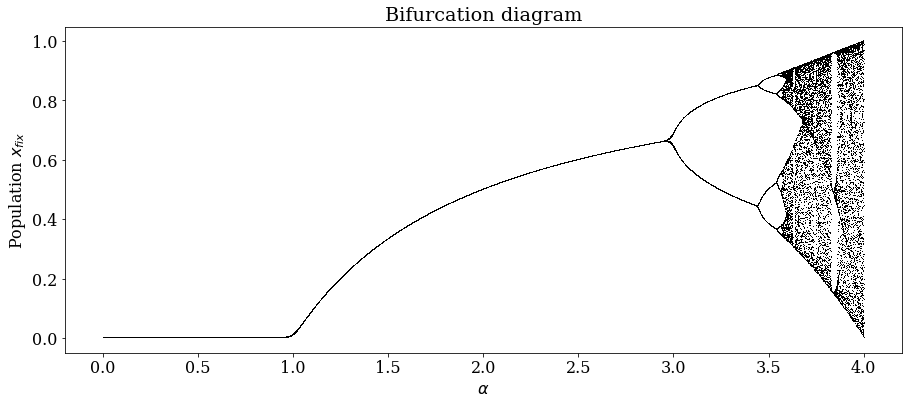

In [13]:
# compute time evolution for alpha values ...
nalpha = 5000
alpha1 = numpy.linspace(0.,4.,nalpha)

# ... and plot values of last storemax iterations
storemax = 20

x0 = 0.5        # initial population
itermax = 100   # maximum iteration

# store storemax values for each alpha
store_x = numpy.zeros((storemax,nalpha))
store_alpha = numpy.zeros((storemax,nalpha))

# compute and plot bifurcation diagram
bifurcation(nalpha, storemax, itermax, x0, alpha1, store_x, store_alpha)        

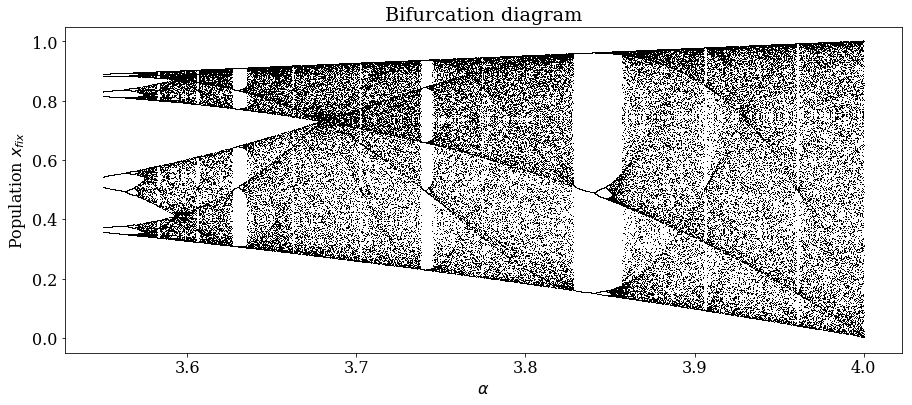

In [15]:
# compute time evolution for alpha values ...
nalpha = 5000
alpha1 = numpy.linspace(3.55,4.,nalpha)

# ... and plot values of last storemax iterations
storemax = 20

x0 = 0.5        # initial population
itermax = 100   # maximum iteration

# store storemax values for each alpha
store_x = numpy.zeros((storemax,nalpha))
store_alpha = numpy.zeros((storemax,nalpha))

# compute and plot bifurcation diagram
bifurcation(nalpha, storemax, itermax, x0, alpha1, store_x, store_alpha)      